# Analysis of US YouTube Data

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import json 
import requests
from pprint import pprint 

In [18]:
file=pd.read_csv("Resources/USvideos.csv")
canada=pd.read_csv("Resources/CAvideos.csv")


# DataFrame of US YouTube Data

In [4]:
file.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# JSON of US YouTube Data

In [5]:
with open('Resources/US_category_id.json') as file:
    data = json.load(file)
pprint(data)

{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
 

           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/7UMGi6zRySqXopr_rv4sZq6Za2E"',
            'id': '41',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': False,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Thriller'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/RScXhi324h8usyIetreAVb-uKeM"',
            'id': '42',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': False,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Shorts'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiGVrFsuFsd0A"',
            'id': '43',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': False,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Shows'}},
           {'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/x5NxSf5fz8hn4loSN4rvhwzD_pY"',
   

# Assign ID to Category

In [6]:
id_to_category = {}

for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']
        
id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

# Sum of Data by Category ID

In [9]:
groupby_category=file.groupby("category_id")
category=groupby_category.sum()
category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,
1,7284156721,165997476,6075148,17887060,28.0,14.0,13.0
2,520690717,4245656,243010,784447,5.0,10.0,0.0
10,40132892190,1416838584,51179008,125296396,9.0,24.0,0.0
15,764651989,19370702,527379,2660705,4.0,0.0,0.0
17,4404456673,98621211,5133551,11192155,28.0,17.0,2.0
19,343557084,4836246,340427,911511,0.0,0.0,0.0
20,2141218625,69038284,9184466,14740713,8.0,0.0,0.0
22,4917191726,186615999,10187901,24778032,66.0,37.0,0.0
23,5117426208,216346746,7230391,22545582,2.0,0.0,0.0


In [10]:
#category.set_index([list(id_to_category.values()), 'category'])
category_list=list(id_to_category.values())

# Add Category Column to DataFrame

In [11]:
category_add_column=pd.DataFrame({'category':category_list})
category_add_column
category['category']=category_add_column['category']
category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
category_id,,,,,,,,
1,7284156721,165997476,6075148,17887060,28.0,14.0,13.0,Autos & Vehicles
2,520690717,4245656,243010,784447,5.0,10.0,0.0,Music
10,40132892190,1416838584,51179008,125296396,9.0,24.0,0.0,Comedy
15,764651989,19370702,527379,2660705,4.0,0.0,0.0,Science & Technology
17,4404456673,98621211,5133551,11192155,28.0,17.0,2.0,Movies
19,343557084,4836246,340427,911511,0.0,0.0,0.0,Action/Adventure
20,2141218625,69038284,9184466,14740713,8.0,0.0,0.0,Classics
22,4917191726,186615999,10187901,24778032,66.0,37.0,0.0,Documentary
23,5117426208,216346746,7230391,22545582,2.0,0.0,0.0,Drama


In [12]:
index = category.index

# Mean of Category ID

In [19]:
US_groupby_category = file.groupby("category_id")
US_category = US_groupby_category.mean()
US_category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,
1,3.106250e+06,70787.836247,2590.681450,7627.744136,0.011940,0.005970,0.005544
2,1.355965e+06,11056.395833,632.838542,2042.830729,0.013021,0.026042,0.000000
10,6.201003e+06,218918.199011,7907.757726,19359.764524,0.001391,0.003708,0.000000
15,8.311435e+05,21055.110870,573.238043,2892.070652,0.004348,0.000000,0.000000
17,2.025969e+06,45363.942502,2361.339006,5148.185373,0.012879,0.007820,0.000920
19,8.546196e+05,12030.462687,846.833333,2267.440299,0.000000,0.000000,0.000000
20,2.620831e+06,84502.183599,11241.696450,18042.488372,0.009792,0.000000,0.000000
22,1.531835e+06,58135.825234,3173.800935,7719.013084,0.020561,0.011526,0.000000
23,1.480308e+06,62582.223315,2091.521840,6521.718831,0.000579,0.000000,0.000000


In [20]:
category_list=list(id_to_category.values())

In [21]:
US_category_add_column=pd.DataFrame({'category':category_list})
US_category['category']=US_category_add_column['category']
US_category.fillna('N/A')
US_category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
category_id,,,,,,,,
1,3.106250e+06,70787.836247,2590.681450,7627.744136,0.011940,0.005970,0.005544,Autos & Vehicles
2,1.355965e+06,11056.395833,632.838542,2042.830729,0.013021,0.026042,0.000000,Music
10,6.201003e+06,218918.199011,7907.757726,19359.764524,0.001391,0.003708,0.000000,Comedy
15,8.311435e+05,21055.110870,573.238043,2892.070652,0.004348,0.000000,0.000000,Science & Technology
17,2.025969e+06,45363.942502,2361.339006,5148.185373,0.012879,0.007820,0.000920,Anime/Animation
19,8.546196e+05,12030.462687,846.833333,2267.440299,0.000000,0.000000,0.000000,Classics
20,2.620831e+06,84502.183599,11241.696450,18042.488372,0.009792,0.000000,0.000000,Comedy
22,1.531835e+06,58135.825234,3173.800935,7719.013084,0.020561,0.011526,0.000000,Drama
23,1.480308e+06,62582.223315,2091.521840,6521.718831,0.000579,0.000000,0.000000,Family


# Drop Last Row of DataFrame

In [22]:
US_category.drop(US_category.tail(1).index,inplace=True)
US_category

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
category_id,,,,,,,,
1,3.106250e+06,70787.836247,2590.681450,7627.744136,0.011940,0.005970,0.005544,Autos & Vehicles
2,1.355965e+06,11056.395833,632.838542,2042.830729,0.013021,0.026042,0.000000,Music
10,6.201003e+06,218918.199011,7907.757726,19359.764524,0.001391,0.003708,0.000000,Comedy
15,8.311435e+05,21055.110870,573.238043,2892.070652,0.004348,0.000000,0.000000,Science & Technology
17,2.025969e+06,45363.942502,2361.339006,5148.185373,0.012879,0.007820,0.000920,Anime/Animation
19,8.546196e+05,12030.462687,846.833333,2267.440299,0.000000,0.000000,0.000000,Classics
20,2.620831e+06,84502.183599,11241.696450,18042.488372,0.009792,0.000000,0.000000,Comedy
22,1.531835e+06,58135.825234,3173.800935,7719.013084,0.020561,0.011526,0.000000,Drama
23,1.480308e+06,62582.223315,2091.521840,6521.718831,0.000579,0.000000,0.000000,Family


# Bar Chart of US YouTube Views Data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

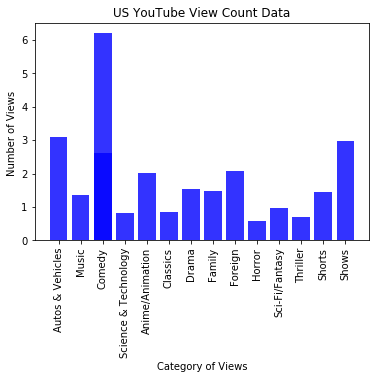

In [27]:
#x_axis[]
x_axis = US_category['category']
y_axis = US_category['views']

plt.title("US YouTube View Count Data")
plt.xlabel("Category of Views")
plt.ylabel("Number of Views ")

plt.bar(x_axis, y_axis/1000000, color='b', alpha=0.8, align='center')
plt.xticks(rotation=90)
#plt.ylim(1000000, 600000000)

# Bar Chart of US YouTube Comments Data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

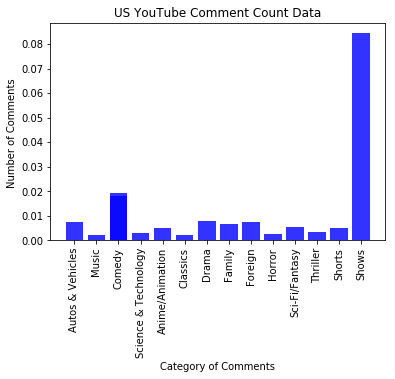

In [28]:
x_axis = US_category['category']
y_axis = US_category['comment_count']

plt.title("US YouTube Comment Count Data")
plt.xlabel("Category of Comments")
plt.ylabel("Number of Comments ")

plt.bar(x_axis, y_axis/1000000, color='b', alpha=0.8, align='center')
plt.xticks(rotation=90)

# Bar Chart of US YouTube Likes Data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

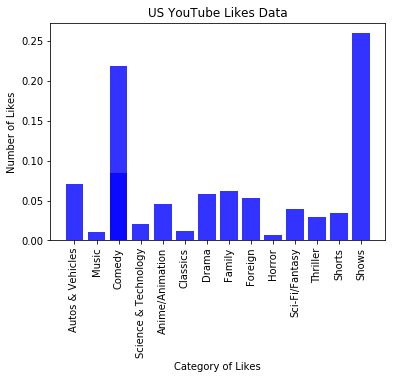

In [29]:
x_axis = US_category['category']
y_axis = US_category['likes']

plt.title("US YouTube Likes Data")
plt.xlabel("Category of Likes")
plt.ylabel("Number of Likes")

plt.bar(x_axis, y_axis/1000000, color='b', alpha=0.8, align='center')
plt.xticks(rotation=90)

# Bar Chart of US YouTube Dislikes Data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

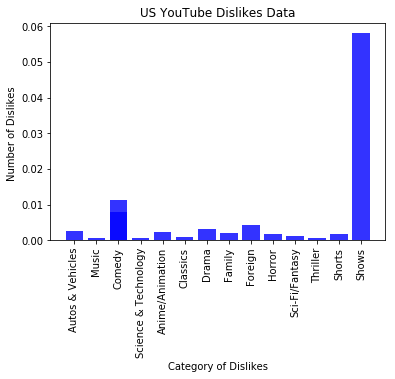

In [30]:
x_axis = US_category['category']
y_axis = US_category['dislikes']

plt.title("US YouTube Dislikes Data")
plt.xlabel("Category of Dislikes")
plt.ylabel("Number of Dislikes ")

plt.bar(x_axis, y_axis/1000000, color='b', alpha=0.8, align='center')
plt.xticks(rotation=90)